In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
tg=pd.read_csv(r"C:\Users\91805\OneDrive\Desktop\Dataset\stock pridiction\NFLS.csv")

In [3]:
tg.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262,268,250,254,254,11896100
1,06-02-2018,248,267,245,266,266,12595800
2,07-02-2018,267,272,264,265,265,8981500
3,08-02-2018,267,268,250,250,250,9306700
4,09-02-2018,254,256,236,249,249,16906900


In [4]:
tg.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,31-01-2022,402,428,398,427,427,20047500
1005,01-02-2022,433,458,426,457,457,22542300
1006,02-02-2022,448,452,426,429,429,14346000
1007,03-02-2022,421,429,404,406,406,9905200
1008,04-02-2022,407,413,397,410,410,7782400


In [5]:
tg.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.070367,425.325074,412.415263,419.017839,419.017839,7.570685e+06
std,108.536339,109.247132,107.555583,108.294891,108.294891,5.465535e+06
min,234.000000,251.000000,231.000000,234.000000,234.000000,1.144000e+06
25%,331.000000,336.000000,326.000000,332.000000,332.000000,4.091900e+06
50%,378.000000,383.000000,371.000000,379.000000,379.000000,5.934500e+06
75%,509.000000,516.000000,503.000000,509.000000,509.000000,9.322400e+06
max,692.000000,701.000000,686.000000,692.000000,692.000000,5.890430e+07


In [6]:
NAN=[(c,tg[c].isnull().mean()*100)for c in tg]
NAN=pd.DataFrame(NAN,columns=['column_name','percentage'])
NAN

,column_name,percentage
0,Date,0.0
1,Open,0.0
2,High,0.0
3,Low,0.0
4,Close,0.0
5,Adj Close,0.0
6,Volume,0.0


In [7]:
srt=tg.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Close,Adj Close,Volume
249,01-02-2019,337,347,337,340,340,9827800
752,01-02-2021,537,545,532,539,539,3547500
1005,01-02-2022,433,458,426,457,457,22542300
17,01-03-2018,293,295,284,290,290,11932100
268,01-03-2019,362,363,355,357,357,5526500


In [8]:
srt.reset_index(inplace=True)

In [9]:
srt.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,249,01-02-2019,337,347,337,340,340,9827800
1,752,01-02-2021,537,545,532,539,539,3547500
2,1005,01-02-2022,433,458,426,457,457,22542300
3,17,01-03-2018,293,295,284,290,290,11932100
4,268,01-03-2019,362,363,355,357,357,5526500


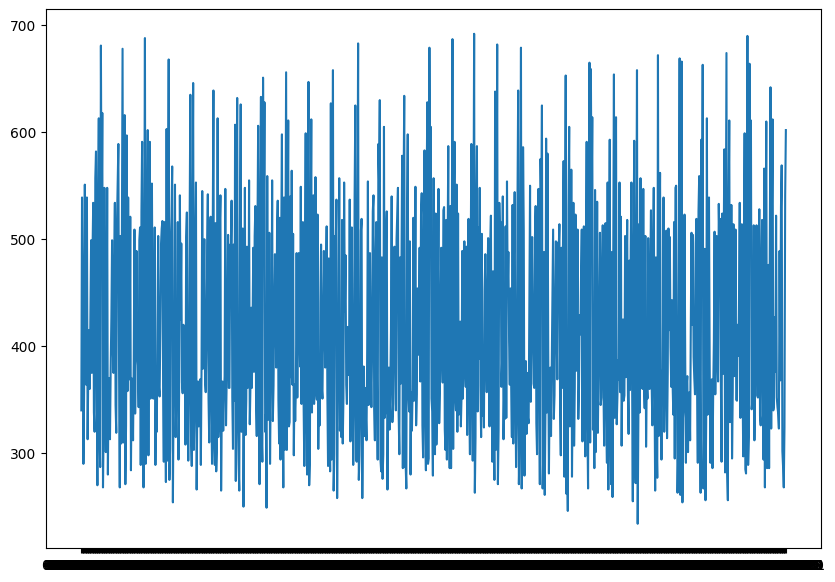

In [10]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [11]:
close_srt = srt['Close']
close_srt

0       340
1       539
2       457
3       290
4       357
       ... 
1004    287
1005    268
1006    324
1007    541
1008    602
Name: Close, Length: 1009, dtype: int64

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [13]:
close_srt= scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.23144105],
       [0.66593886],
       [0.48689956],
       ...,
       [0.19650655],
       [0.67030568],
       [0.80349345]])

In [14]:
train_size=int(len(close_srt)*0.7)

In [15]:
test_size=len(close_srt)-train_size
train_data,test_data=close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [16]:
train_data.shape

(706, 1)

In [17]:
test_data.shape

(303, 1)

In [18]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [19]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [20]:
print(X_train.shape),print(y_train.shape)

(605, 100)
(605,)


(None, None)

In [21]:
print(X_test.shape),print(y_test.shape)

(202, 100)
(202,)


(None, None)

In [22]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [23]:
X_test

array([[[0.27729258],
        [0.63100437],
        [0.31222707],
        ...,
        [0.27510917],
        [0.68340611],
        [0.28820961]],

       [[0.63100437],
        [0.31222707],
        [0.40829694],
        ...,
        [0.68340611],
        [0.28820961],
        [0.23580786]],

       [[0.31222707],
        [0.40829694],
        [0.60043668],
        ...,
        [0.28820961],
        [0.23580786],
        [0.58733624]],

       ...,

       [[0.37117904],
        [0.59606987],
        [0.26419214],
        ...,
        [0.73144105],
        [0.14847162],
        [0.11572052]],

       [[0.59606987],
        [0.26419214],
        [0.39082969],
        ...,
        [0.14847162],
        [0.11572052],
        [0.07423581]],

       [[0.26419214],
        [0.39082969],
        [0.58733624],
        ...,
        [0.11572052],
        [0.07423581],
        [0.19650655]]])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60

9/9 [==============================] - 39s 555ms/step - loss: 0.1132 - val_loss: 0.0588
Epoch 2/60
9/9 [==============================] - 2s 184ms/step - loss: 0.0577 - val_loss: 0.0620
Epoch 3/60
9/9 [==============================] - 2s 216ms/step - loss: 0.0566 - val_loss: 0.0592
Epoch 4/60
9/9 [==============================] - 2s 176ms/step - loss: 0.0565 - val_loss: 0.0594
Epoch 5/60
9/9 [==============================] - 2s 205ms/step - loss: 0.0558 - val_loss: 0.0579
Epoch 6/60
9/9 [==============================] - 1s 148ms/step - loss: 0.0560 - val_loss: 0.0580
Epoch 7/60
9/9 [==============================] - 2s 175ms/step - loss: 0.0559 - val_loss: 0.0577
Epoch 8/60
9/9 [==============================] - 2s 222ms/step - loss: 0.0560 - val_loss: 0.0581
Epoch 9/60
9/9 [==============================] - 2s 188ms/step - loss: 0.0561 - val_loss: 0.0577
Epoch 10/60
9/9 [==============================] - 2s 179ms/step - loss: 0.0562 - val_loss: 0.0579
Epoch 11/60
9/9 [

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 52ms/step


In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error

In [31]:
math.sqrt(mean_squared_error(y_train, train_predict))

412.13245863396827

In [33]:
#math.sqrt(mean_squared_error(y_test, train_predict))

In [34]:
look_back=100

In [35]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

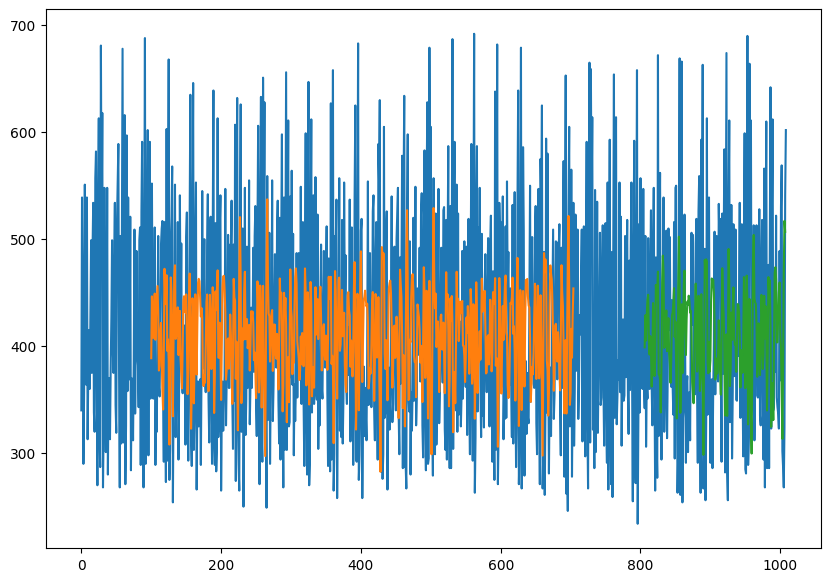

In [37]:
trainPredictPlot= np.empty_like(close_srt)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(close_srt)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1,:]=test_predict
plt.figure(figsize=(10,7))
plt.plot(scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
# Prediction for next 30days

In [39]:
len(test_data)

303

In [57]:
pred_input=test_data[203:].reshape(1,-1)
pred_input.shape

(1, 100)

In [58]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [59]:
temp_input

[0.5873362445414847,
 0.35152838427947597,
 0.29039301310043664,
 0.6528384279475983,
 0.5567685589519651,
 0.6222707423580787,
 0.2925764192139738,
 0.1266375545851528,
 0.6331877729257642,
 0.30567685589519644,
 0.5611353711790392,
 0.7641921397379912,
 0.10480349344978168,
 0.5502183406113537,
 0.9606986899563319,
 0.10698689956331875,
 0.048034934497816595,
 0.6222707423580787,
 0.8231441048034933,
 0.20742358078602618,
 0.2379912663755458,
 0.6506550218340612,
 0.13318777292576423,
 0.2685589519650655,
 0.6113537117903929,
 0.3013100436681223,
 0.388646288209607,
 0.6004366812227073,
 0.2532751091703057,
 0.25109170305676853,
 0.4061135371179039,
 0.3427947598253275,
 0.46506550218340614,
 0.6550218340611353,
 0.21615720524017468,
 0.5458515283842795,
 0.6113537117903929,
 0.2925764192139738,
 0.13755458515283847,
 0.5655021834061136,
 0.7969432314410481,
 0.111353711790393,
 0.1026200873362445,
 0.5895196506550218,
 0.9956331877729256,
 0.12008733624454149,
 0.17685589519650657,


In [60]:
first_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        pred_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,pred_input))
        pred_input=pred_input.reshape(1,-1)
        pred_input=pred_input.reshape(1,n_steps,1)
        yhat=model.predict(pred_input,verbose=0)
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        first_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input=pred_input.reshape(1,n_steps,1)
        yhat=model.predict(pred_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        first_output.extend(yhat.tolist())
        i=i+1
print(first_output)

[0.18813947]
101
1 day input [0.35152838 0.29039301 0.65283843 0.55676856 0.62227074 0.29257642
 0.12663755 0.63318777 0.30567686 0.56113537 0.76419214 0.10480349
 0.55021834 0.96069869 0.1069869  0.04803493 0.62227074 0.8231441
 0.20742358 0.23799127 0.65065502 0.13318777 0.26855895 0.61135371
 0.30131004 0.38864629 0.60043668 0.25327511 0.2510917  0.40611354
 0.34279476 0.4650655  0.65502183 0.21615721 0.54585153 0.61135371
 0.29257642 0.13755459 0.56550218 0.79694323 0.11135371 0.10262009
 0.58951965 0.99563319 0.12008734 0.1768559  0.93886463 0.64847162
 0.8231441  0.23362445 0.2489083  0.29912664 0.60917031 0.17030568
 0.29912664 0.40611354 0.60917031 0.26200873 0.25764192 0.48253275
 0.6419214  0.22052402 0.20087336 0.55021834 0.62008734 0.29912664
 0.13100437 0.72489083 0.07423581 0.58078603 0.8209607  0.11353712
 0.12445415 0.52838428 0.11353712 0.56113537 0.89082969 0.19432314
 0.63537118 0.82532751 0.23144105 0.24235808 0.42139738 0.31004367
 0.62882096 0.25764192 0.23799127 

8 day output [[0.39104134]]
9 day input [0.30567686 0.56113537 0.76419214 0.10480349 0.55021834 0.96069869
 0.1069869  0.04803493 0.62227074 0.8231441  0.20742358 0.23799127
 0.65065502 0.13318777 0.26855895 0.61135371 0.30131004 0.38864629
 0.60043668 0.25327511 0.2510917  0.40611354 0.34279476 0.4650655
 0.65502183 0.21615721 0.54585153 0.61135371 0.29257642 0.13755459
 0.56550218 0.79694323 0.11135371 0.10262009 0.58951965 0.99563319
 0.12008734 0.1768559  0.93886463 0.64847162 0.8231441  0.23362445
 0.2489083  0.29912664 0.60917031 0.17030568 0.29912664 0.40611354
 0.60917031 0.26200873 0.25764192 0.48253275 0.6419214  0.22052402
 0.20087336 0.55021834 0.62008734 0.29912664 0.13100437 0.72489083
 0.07423581 0.58078603 0.8209607  0.11353712 0.12445415 0.52838428
 0.11353712 0.56113537 0.89082969 0.19432314 0.63537118 0.82532751
 0.23144105 0.24235808 0.42139738 0.31004367 0.62882096 0.25764192
 0.23799127 0.22489083 0.19432314 0.55676856 0.29257642 0.64628821
 0.73144105 0.14847162 

16 day output [[0.38757002]]
17 day input [0.62227074 0.8231441  0.20742358 0.23799127 0.65065502 0.13318777
 0.26855895 0.61135371 0.30131004 0.38864629 0.60043668 0.25327511
 0.2510917  0.40611354 0.34279476 0.4650655  0.65502183 0.21615721
 0.54585153 0.61135371 0.29257642 0.13755459 0.56550218 0.79694323
 0.11135371 0.10262009 0.58951965 0.99563319 0.12008734 0.1768559
 0.93886463 0.64847162 0.8231441  0.23362445 0.2489083  0.29912664
 0.60917031 0.17030568 0.29912664 0.40611354 0.60917031 0.26200873
 0.25764192 0.48253275 0.6419214  0.22052402 0.20087336 0.55021834
 0.62008734 0.29912664 0.13100437 0.72489083 0.07423581 0.58078603
 0.8209607  0.11353712 0.12445415 0.52838428 0.11353712 0.56113537
 0.89082969 0.19432314 0.63537118 0.82532751 0.23144105 0.24235808
 0.42139738 0.31004367 0.62882096 0.25764192 0.23799127 0.22489083
 0.19432314 0.55676856 0.29257642 0.64628821 0.73144105 0.14847162
 0.11572052 0.07423581 0.19650655 0.67030568 0.80349345 0.18813947
 0.23895893 0.3810897

25 day output [[0.38779488]]
26 day input [0.38864629 0.60043668 0.25327511 0.2510917  0.40611354 0.34279476
 0.4650655  0.65502183 0.21615721 0.54585153 0.61135371 0.29257642
 0.13755459 0.56550218 0.79694323 0.11135371 0.10262009 0.58951965
 0.99563319 0.12008734 0.1768559  0.93886463 0.64847162 0.8231441
 0.23362445 0.2489083  0.29912664 0.60917031 0.17030568 0.29912664
 0.40611354 0.60917031 0.26200873 0.25764192 0.48253275 0.6419214
 0.22052402 0.20087336 0.55021834 0.62008734 0.29912664 0.13100437
 0.72489083 0.07423581 0.58078603 0.8209607  0.11353712 0.12445415
 0.52838428 0.11353712 0.56113537 0.89082969 0.19432314 0.63537118
 0.82532751 0.23144105 0.24235808 0.42139738 0.31004367 0.62882096
 0.25764192 0.23799127 0.22489083 0.19432314 0.55676856 0.29257642
 0.64628821 0.73144105 0.14847162 0.11572052 0.07423581 0.19650655
 0.67030568 0.80349345 0.18813947 0.23895893 0.38108972 0.44165835
 0.42163503 0.38828933 0.37737933 0.3838     0.39104134 0.39216819
 0.38973609 0.38772947

In [61]:
#Ploting last 130days closing Price

In [63]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [64]:
len(close_srt)

1009

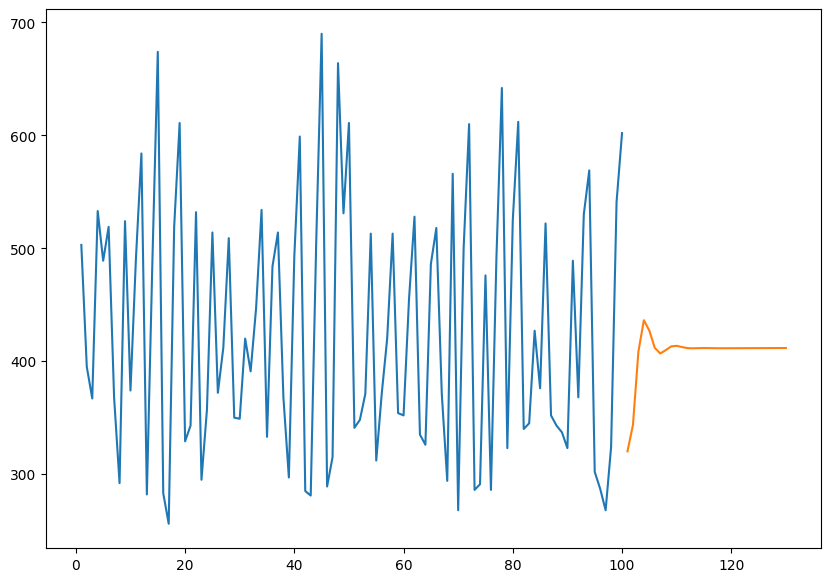

In [69]:
plt.figure(figsize=(10,7))
plt.plot(day_new,scaler.inverse_transform(close_srt[909:]))
plt.plot(day_pred,scaler.inverse_transform(first_output))

In [70]:
#Appending in list is done to make continuous graph

In [71]:
df3=close_srt.tolist()
#adding specified list of predicted 30days output to the end of last 100 days output
df3.extend(first_output)

In [72]:
print(len(df3))

1039


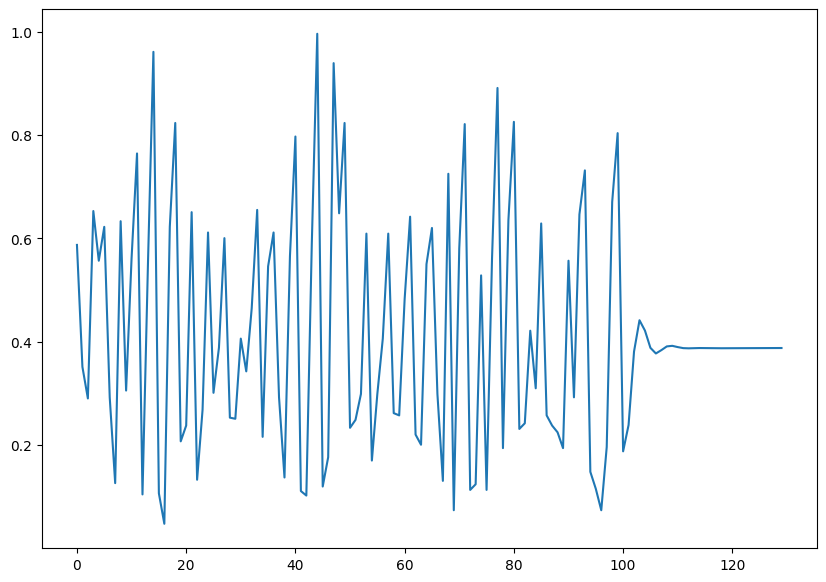

In [73]:
plt.figure(figsize=(10,7))
plt.plot(df3[909:])

In [74]:
#Plotting the graph with predicated 30days output

In [75]:
df3=scaler.inverse_transform(df3).tolist() # undoing scaling of df3

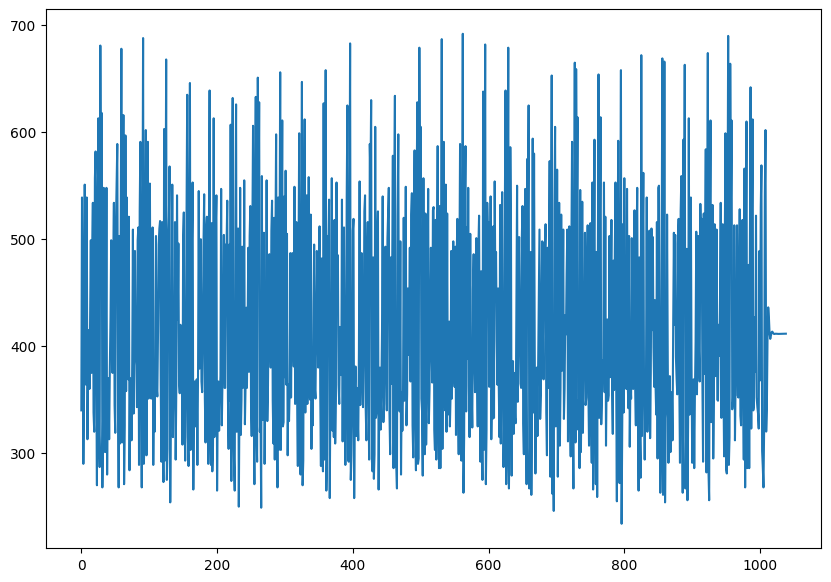

In [76]:
plt.figure(figsize=(10,7))
plt.plot(df3)